In [1]:
%matplotlib inline
import fragmenter
import json 
from openeye import oechem, oequacpac, oedepict, oegraphsim
import matplotlib.pyplot as plt
import glob
import seaborn as sbn
import oenotebook as onb
import cmiles
import itertools
import numpy as np
import oenotebook as oenb

In [2]:
def get_bond(mol, bond_tuple):
    a1 = mol.GetAtom(oechem.OEHasMapIdx(bond_tuple[0]))
    a2 = mol.GetAtom(oechem.OEHasMapIdx(bond_tuple[1]))
    if not a1 or not a2:
        print('no atoms')
        return False
    bond = mol.GetBond(a1, a2)
    if not bond:
        print('no bond')
        return False
    return bond


In [3]:
with open('Gemifloxacin_0_wbo_dists.json', 'r') as f:
    results = json.load(f)
results = results['[8, 22]']
with open('Gemifloxacin_0_pfizer_wbo_dists.json', 'r') as f:
    pfizer_results = json.load(f)


In [16]:
torsion_wbos = {'parent': [], '0.03_path_length_False_None': [], 'pfizer': [], 'optimal': [], 'not_optimal': [],
               'optimal_front': []}
for frag in torsion_wbos:
    print(frag)
    mol = oechem.OEMol()
    if frag == 'pfizer':
        smiles = pfizer_results['[8, 22]']['frag']
    elif frag == 'optimal':
        smiles = "[H:29][c:1]1[c:3]2[c:7]([n:19][c:8]([c:6]1[F:28])[N@:22]3[C:11]([CH2:9][C@@:15]([C:14]3([H:37])[H:38])([H:39])[C:18]([H:44])([H:45])[N+:23]([H:46])([H:47])[H:48])([H:31])[H:32])[NH:21][C:2](=[CH:4][CH2:5]2)[H:30]"
    elif frag == 'not_optimal':
        smiles = "[H:29][c:1]1[c:6]([c:8]([n:19][c:7]2[c:3]1[c:5](=[O:25])[c:4]([c:2]([nH:21]2)[H:30])[CH:10]=[O:26])[N@@:22]3[C:14]([C@@:15]([CH2:9][C:11]3([H:31])[H:32])([H])[H:39])([H:37])[H:38])[F:28]"
    elif frag == 'optimal_front':
        smiles = "[H:29][c:1]1[c:3]2[c:7]([n:19][c:8]([c:6]1[F:28])[N@:22]3[C:11]([CH2:9][C@@:15]([C:14]3([H:37])[H:38])([H:39])[C:18]([H:44])([H:45])[N+:23]([H:46])([H:47])[H:48])([H:31])[H:32])[NH:21][C:2](=[C:4]([CH2:5]2)[CH2:10][O-:24])[H:30]"

    else:
        smiles = results[frag]['frag']
    print(smiles)
    oechem.OESmilesToMol(mol, smiles)
    
    dih = fragmenter.torsions.find_torsion_around_bond(molecule=mol, bond=(8, 22))
    conformers = fragmenter.chemi.generate_grid_conformers(mol, dihedrals=[dih], intervals=[30])
    for conf in conformers.GetConfs():
        mol_copy = oechem.OEMol(conf)
        oechem.OEAddExplicitHydrogens(mol_copy)
        if oequacpac.OEAssignPartialCharges(mol_copy, oequacpac.OECharges_AM1BCCSym):
            bond = get_bond(mol=mol_copy, bond_tuple=(8, 22))
            wbo = bond.GetData('WibergBondOrder')
            print(wbo)
            torsion_wbos[frag].append(wbo)



parent
[H:29][c:1]1[c:3]2[c:5](=[O:25])[c:4]([c:2]([n:21]([c:7]2[n:19][c:8]([c:6]1[F:28])[N@:22]3[C:11](/[C:9](=[N:20]\[O:27][C:17]([H:41])([H:42])[H:43])/[C@@:15]([C:14]3([H:37])[H:38])([H:39])[C:18]([H:44])([H:45])[N+:23]([H:46])([H:47])[H:48])([H:31])[H:32])[C:16]4([C:12]([C:13]4([H:35])[H:36])([H:33])[H:34])[H:40])[H:30])[C:10](=[O:26])[O-:24]
0.9972624182701111
0.9875487089157104
0.9647473692893982
0.9495575428009033
0.9621031880378723
0.9866178035736084
0.9989600777626038
0.9888126254081726
0.9690046906471252
0.955868661403656
0.9681481719017029
0.9861347675323486
0.03_path_length_False_None
[CH3:18][C@H:15]\1[CH2:14][N:22]([CH2:11]/[C:9]1=[N:20]\[OH:27])[c:8]2[c:6]([cH:1][c:3]3[c:7]([n:19]2)[N:21]([CH:2]=[CH:4][CH2:5]3)[CH:16]4[CH2:12][CH2:13]4)[F:28]
1.0861504077911377
1.0739591121673584
1.0208628177642822
0.9814121723175049
1.0179826021194458
1.0868066549301147
1.090082049369812
1.0609052181243896
1.0154961347579956
0.9829202890396118
1.0150957107543945
1.0570162534713745
pfiz

(0.54, 1.45)

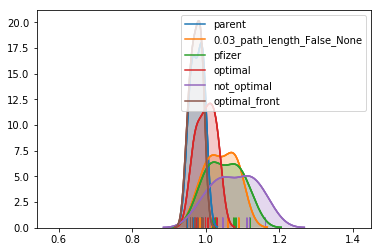

In [18]:
for i, f in enumerate(torsion_wbos):
    
    sbn.kdeplot(torsion_wbos[f], shade=True, label=f)
    sbn.distplot(torsion_wbos[f], rug=True, hist=False, color=sbn.color_palette()[i])
    sbn.distplot(torsion_wbos[f], hist=False, color=sbn.color_palette()[i])
plt.legend()
plt.xlim(0.54, 1.45)

In [21]:
dih = fragmenter.torsions.find_torsion_around_bond(molecule=mol, bond=(8, 22))

In [28]:
conformers = fragmenter.chemi.generate_grid_conformers(mol, dihedrals=[dih], intervals=[30])

In [29]:
wbos = []
for conf in conformers.GetConfs():
    mol_copy = oechem.OEMol(conf)
    oechem.OEAddExplicitHydrogens(mol_copy)
    if oequacpac.OEAssignPartialCharges(mol_copy, oequacpac.OECharges_AM1BCCSym):
        bond = get_bond(mol=mol_copy, bond_tuple=(8, 22))
        wbos.append(bond.GetData('WibergBondOrder'))

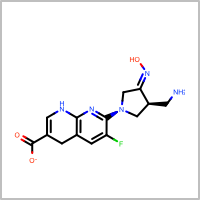

In [15]:
oenb.draw_smiles('c1c2c(nc(c1F)[N@@]3C[C@@H](/C(=N/O)/C3)C[NH3+])NC=C(C2)C(=O)[O-]')

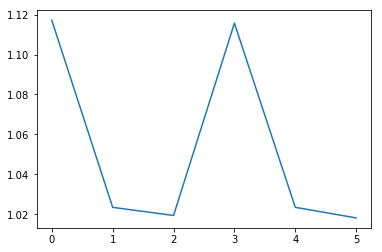